In [116]:
import pandas as pd

In [117]:
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/4028272233.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [118]:
log = pd.read_csv("log2.csv", header=None) # load in the log2.csv file 
log.rename(columns = {0: "Sentiment", 
                      1: "Publication_URL",
                      2: "product_URL",
                      3: "clickORnot",
                      4: "gender",
                      5: "age_group"}, inplace = True) # give each column a column name 
log.head()

,Sentiment,Publication_URL,product_URL,clickORnot,gender,age_group
0,positive,https://www.foxnews.com/,https://lees.com/jeans,0,female,juvenile
1,neutral,https://www.mirror.co.uk/news/,https://coach.com/purses,0,male,young
2,negative,https://www.nbcnews.com/,https://covergirl.co/lipsticks,0,male,middle-age
3,positive,https://www.examiner.com/,https://covergirl.co/makeup,0,male,juvenile
4,negative,https://www.nj.com,https://dell.com/computers,1,female,young


In [119]:
products = pd.read_csv("products.csv") # load in the products.csv file 
category = pd.read_csv("product_categories.csv") # load in the product_categories.csv file 
category = category.rename(columns={"product": "product_type"}) # rename column product to product_type 
for col in products.columns:
    products[col] = products[col].str.strip() # delete all the spaces for each data entry in dataframe products 
for col in category.columns:
    category[col] = category[col].str.strip() # delete all the spaces for each data entry in dataframe category 


In [120]:
category.head()

,product_type,category
0,blender,small kitchen appliances
1,pressure cooker,small kitchen appliances
2,computer,consumer electronics
3,coffee,packaged food
4,vitamin,health


In [121]:
products.drop_duplicates(inplace=True) # drop duplicate row in dataframe products 

In [122]:
products = products.reset_index().iloc[:,[1,2,3]] # reset index for dataframe products 
products.head()

,product,product_URL,product_type
0,Vitamix blender,https://vitamix.com/blenders,blender
1,Lenova laptop,https://lenova.com/laptops,computer
2,InstantPot pressure cooker,https://InstantPot.com/cookers,pressure cooker
3,NemoK blender,http://nemoK.co/blenders,blender
4,Hamilton Beach blender,https://HamiltonBeach/blenders,blender


In [123]:
products_url = products.iloc[:,1]
len(products_url.unique()) # there are total 50 different URLs

50

# Task 1

Some of the Product_URLs in the log file might have been corrupted. Write a Python (or PySpark) procedure to determine which Product_URLs are corrupted. Let us assume that if a Product_url in the log file doesn’t occur in the products table, it is regarded as corrupted. Using this procedure identify and list the corrupted URLs. (10)

# Answer 1

The way I detect corrupted URLs is to loop through all the URLs in the log dataframe and match it with the unique product URLs in the products dataframe. Below list contains all the indices for corrupted URLs in the dataframe log.

In [124]:
yes_indices = []
no_indices = []
for i, url in enumerate(log.iloc[:,2]):
    if url in set(products_url): # if the URL in log is also in products, then this URL is not corrupted 
        yes_indices.append(i)
    else: # otherwise, it is a corrupted URL 
        no_indices.append(i)
# print(yes_indices)
print(no_indices)
len(no_indices) # there are total 216 corrupted URLs

[83, 109, 123, 171, 203, 212, 245, 273, 339, 434, 436, 497, 562, 618, 738, 779, 790, 798, 830, 857, 870, 913, 945, 1025, 1057, 1113, 1138, 1239, 1249, 1338, 1405, 1452, 1609, 1695, 1761, 1767, 1801, 1861, 1900, 1910, 1913, 1995, 1996, 2014, 2057, 2138, 2143, 2161, 2173, 2242, 2252, 2269, 2292, 2294, 2371, 2427, 2433, 2529, 2629, 2669, 2678, 2713, 2769, 2939, 3014, 3020, 3060, 3067, 3076, 3139, 3234, 3248, 3320, 3321, 3353, 3385, 3433, 3444, 3500, 3521, 3537, 3557, 3567, 3577, 3615, 3849, 3863, 3876, 4044, 4088, 4163, 4274, 4570, 4694, 4710, 4735, 4740, 4757, 4864, 4929, 5020, 5092, 5116, 5236, 5274, 5308, 5329, 5372, 5416, 5458, 5482, 5516, 5578, 5596, 5616, 5664, 5713, 5741, 5756, 5782, 5838, 5871, 5875, 5876, 6012, 6034, 6107, 6181, 6272, 6291, 6338, 6365, 6411, 6413, 6465, 6467, 6483, 6484, 6541, 6615, 6620, 6713, 6784, 6787, 6858, 6861, 6911, 6952, 6957, 7013, 7045, 7046, 7047, 7119, 7134, 7191, 7204, 7207, 7231, 7260, 7263, 7287, 7388, 7420, 7456, 7487, 7490, 7532, 7669, 7688, 772

216

# Task 2

For each corrupted URL what will you do with it? Don’t assume that for each corrupted URL the correct approach is to delete that log entry. What if the URL contained ‘.cam’ instead of ‘.com’ but otherwise corresponded with a URL in the ‘products’ table? In that case the proper approach would be to correct the URL. In other cases, the URL might be so corrupted that the best approach would be to delete that log entry (the entire row). Describe your approach to dealing with corrupted URLs. That is, describe your approach to determining that a URL is too corrupted to be rescued. It must describe a) a procedure for determining the degree to which the URL is corrupted, b) a threshold for determining in terms of this degree of corruption whether it can be corrected, and c) for those which can be corrected, identifying its corrected form. For extra credit implement this in a Python (or PySpark) program. (25 + 20 points for extra-credit)

# Answer 2

The way I use to evaluate how corrupted the URL is is using a function called SequenceMatcher from difflib package. This function calculates a similarity score between two URLs (a corrupted one and a correct one) and if the score passes a threshold, then these two URLs are considered similar (the corrupted URL is not too corrupted). When the threshold is 0.95, there are three URLs don't pass the threshold and are considered too corrupted. The indices of them are 790, 5876, and 7263. Actually, we can see that those URLs are not too corrupted; they are only off by one letter, so I decide to decrease the threshold to 0.9. 

After changing the threshold to 0.9, there are no super corrupted URLs; all of them have been corrected in the dataframe log. 

In [125]:
url_log = log.iloc[:,2]
unique_log = set(url_log)
unique_log = list(unique_log) # unique_log contains all the unique URLs in dataframe log 

In [126]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio() # we are using SequenceMatcher to compare how similar two URLs is 

In [127]:
temp = []
for i in range(len(unique_log)):
    for l in range(len(products_url)):
        score = similar(str(unique_log[i]), str(products_url[l]))
        if score > 0.95: # if the score calculated between two URLs is above threshold 0.95, then these two URLs are similar and can be corrected 
            temp.append([unique_log[i],products_url[l]])

In [128]:
temp.sort()
temp[0:5] # temp contains pairs of the corrupted URL and the correct URL 

[['http://maybellije.com/lipstick', 'http://maybelline.com/lipstick'],
 ['http://maybelline.com/lipstick', 'http://maybelline.com/lipstick'],
 ['http://maybelline.com/lipstuck', 'http://maybelline.com/lipstick'],
 ['http://maybelline.com/xipstick', 'http://maybelline.com/lipstick'],
 ['http://nejoK.co/blenders', 'http://nemoK.co/blenders']]

In [129]:
for i in range(len(temp)):
    for l in range(len(log)):
        if temp[i][0] == log.iloc[l,2]:
            log.iloc[l,2] = temp[i][1] # correcting the corrupted URLs in the dataframe log 

In [130]:
yes_indices = []
no_indices = []
for i, url in enumerate(log.iloc[:,2]):
    if url in set(products_url):
        yes_indices.append(i)
    else:
        no_indices.append(i)
print(no_indices) # there are only three corrupted URLs after we detecting and correcting others

[790, 5876, 7263]


In [131]:
print(log.iloc[790,2])
print(log.iloc[5876,2])
print(log.iloc[7263,2])

https://besla.com
https://tesla.rom
https://lg.comxtvs


In [132]:
temp = []
for i in range(len(unique_log)):
    for l in range(len(products_url)):
        score = similar(str(unique_log[i]), str(products_url[l]))
        if score > 0.90: # if the score calculated between two URLs is above threshold 0.9, then these two URLs are similar and can be corrected 
            temp.append([unique_log[i],products_url[l]])

In [133]:
for i in range(len(temp)):
    for l in range(len(log)):
        if temp[i][0] == log.iloc[l,2]:
            log.iloc[l,2] = temp[i][1] # correcting the corrupted URLs in the dataframe log 

In [134]:
yes_indices = []
no_indices = []
for i, url in enumerate(log.iloc[:,2]):
    if url in set(products_url):
        yes_indices.append(i)
    else:
        no_indices.append(i)
print(no_indices) # there are no corrupted URLs anymore after we detecting and correcting them 

[]


# Task 3

For each product, compute all the Publication_URLs containing an ad for that product. (Don’t just give the results. Show all the work by which you got those results. This applies to all the questions below.) (10)

# Answer 3

In order to find all the unique Publication_URLs containing an ad for that product, I first merge dataframes log and products to create a new dataframe called new. Then, I groupby dataframe new ny column "Publication_URL" and display column "product". For each product, I extract only unique publication URLs and store them into a list. Then, I convert all the entries of that list from list to string and create a dataframe callend url_product containing two columns: product and URL_list_unique. 

In [135]:
new = pd.merge(log, products, on = "product_URL")
new.head() # I created a new dataframe that merges dataframes log and products 

,Sentiment,Publication_URL,product_URL,clickORnot,gender,age_group,product,product_type
0,positive,https://www.foxnews.com/,https://lees.com/jeans,0,female,juvenile,Lee jeans,jeans
1,negative,https://www.nytimes.com/,https://lees.com/jeans,0,female,middle-age,Lee jeans,jeans
2,positive,https://www.cnn.com/,https://lees.com/jeans,1,female,middle-age,Lee jeans,jeans
3,negative,https://www.chicagotribune.com/,https://lees.com/jeans,0,male,young,Lee jeans,jeans
4,positive,https://www.salon.com/,https://lees.com/jeans,1,female,middle-age,Lee jeans,jeans


In [136]:
number_product = new.groupby("product")["Publication_URL"] # I groupby the dataframe new by column "Publication_URL" and display column "product"

In [137]:
temp_list = [] # this list contains all the unique Publication_URLs containing an ad for one product
for key, item in number_product:
    # print(key); each key represents a product 
    temp_list.append(number_product.get_group(key).unique())

In [138]:
for i in range(len(temp_list)):
    temp_list[i] = temp_list[i].tolist() # we convert the result to lists

In [139]:
# create a new dataframe that stores two columns: product and all the Publication_URLs containing an ad for that product (URL_list_unique)
number_product = new.groupby("product")["Publication_URL"].count()
url_product = number_product.reset_index()
url_product = url_product.rename(columns={"Publication_URL": "URL_count"})
url_product["URL_list_unique"] = temp_list

In [140]:
# convert all the entries of "URL_list_unique" from list to string 
# create a new dataframe called url_product that stores information of product and unique publication URLs 
for i in range(len(url_product)):
    url_product.iloc[i,2] = ', '.join(url_product.iloc[i,2])
url_product = url_product.iloc[:,[0,2]]
url_product

,product,URL_list_unique
0,Apple computer,"https://www.nydailynews.com/, https://www.mirror.co.uk/news/, https://www.cbsnews.com/, https://www.engadget.com/, https://www.usatoday.com/, https://www.cnet.com/, https://nypost.com/, https://www.nj.com, https://www.dallasnews.com/, https://abcnews.go.com/, https://www.bostonglobe.com/, https://www.boston.com, https://www.cnn.com/, https://www.upworthy.com/"
1,Apple iPad,"https://mashable.com/, https://www.boston.com, https://www.nj.com, https://www.sfgate.com/, https://www.mirror.co.uk/news/, https://www.businessinsider.com/, https://www.cnn.com/, https://www.vice.com/en_us, https://www.npr.org/, https://www.slate.com/, https://www.chicagotribune.com/, https://nypost.com/, https://www.latimes.com/, https://www.theguardian.com/us, https://www.examiner.com/, https://www.telegraph.co.uk/, https://www.al.com/"
2,Apple laptop,"https://www.vox.com/, https://www.bbc.com/, https://abcnews.go.com/, https://www.telegraph.co.uk/, https://nypost.com/, https://www.buzzfeed.com/, https://www.usatoday.com/, https://www.nytimes.com/, https://www.thedailybeast.com/, https://www.businessinsider.com/"
3,BasilBasel perfume,"https://www.salon.com/, https://www.independent.co.uk/, https://www.chicagotribune.com/, https://www.buzzfeed.com/, https://techcrunch.com/, https://www.examiner.com/, https://www.engadget.com/, https://www.nydailynews.com/, https://www.businessinsider.com/, https://www.msn.com/en-us/news, https://www.vice.com/en_us, https://www.nytimes.com/, https://www.cnn.com/, https://www.washingtonpost.com/, https://www.boston.com"
4,Broyhill recliner,"https://www.theatlantic.com/, https://www.upworthy.com/, https://www.buzzfeed.com/, https://www.cnn.com/, https://www.huffingtonpost.com/, https://time.com/, https://www.npr.org/, https://techcrunch.com/, https://www.vice.com/en_us, https://www.vox.com/, https://www.nydailynews.com/, https://www.usatoday.com/, https://www.al.com/, https://www.nbcnews.com/, https://www.boston.com, https://www.salon.com/"
5,Centrum MultiVitamins,"https://mashable.com/, https://time.com/, https://www.nytimes.com/, https://www.independent.co.uk/, https://www.vox.com/, https://www.latimes.com/, https://www.washingtonpost.com/, https://www.al.com/, https://www.mirror.co.uk/news/, https://www.cnn.com/, https://www.upworthy.com/, https://www.engadget.com/, https://www.boston.com, https://techcrunch.com/, https://www.thedailybeast.com/, https://www.dallasnews.com/, https://www.usatoday.com/, https://www.nydailynews.com/, https://www.buzzfeed.com/"
6,Clinique moisturizer,"https://www.chicagotribune.com/, https://www.latimes.com/, https://www.huffingtonpost.com/, https://www.salon.com/, https://www.theguardian.com/us, https://www.bostonglobe.com/, https://www.examiner.com/, https://www.bbc.com/, https://www.usnews.com/, https://www.msn.com/en-us/news, https://www.nbcnews.com/, https://techcrunch.com/, https://www.nytimes.com/, https://www.cnn.com/, https://nypost.com/, https://www.washingtonpost.com/"
7,Coach purse,"https://www.mirror.co.uk/news/, https://www.foxnews.com/, https://www.engadget.com/, https://abcnews.go.com/, https://www.salon.com/, https://www.chicagotribune.com/, https://www.upworthy.com/, https://www.washingtonpost.com/, https://www.cnn.com/, https://techcrunch.com/, https://www.nbcnews.com/, https://www.businessinsider.com/, https://www.al.com/, https://www.vox.com/, https://www.nytimes.com/, https://www.nj.com, https://www.boston.com, https://www.nydailynews.com/"
8,Cougar jeans,"https://www.sfgate.com/, https://www.theguardian.com/us, https://www.slate.com/, https://mashable.com/, https://time.com/, https://www.buzzfeed.com/, https://www.cbsnews.com/, https://techcrunch.com/, https://www.boston.com, https://www.dallasnews.com/, https://www.nytimes.com/, https://www.al.com/, https://www.msn.com/en-us/news, https://www.salon.com/, https://www.bostonglobe.com/, https://www.nydailynews.com/, https://www.telegraph.co.uk/"
9,Covergirl makeup,"https://www.exa

# Task 4

For each product type, compute all the Publication_URLs containing an ad for that product type. Your solution must be scalable. That is, it should work well even if there are hundreds of products in each product_type and there are hundreds of product_types. (Hint: To make it scalable you should consider using a Python or PySpark script instead of a SQL query.) (20)

# Answer 4

In order to find all the unique Publication_URLs containing an ad for that product type, I groupby dataframe new ny column "Publication_URL" and display column "product_type". For each product, I extract only unique publication URLs and store them into a list. Then, I convert all the entries of that list from list to string and create a dataframe callend url_product_type containing two columns: product_type and URL_list_unique. 

In [141]:
# I groupby the dataframe new by column "Publication_URL" and display column "product_type"
number_product_type = new.groupby("product_type")["Publication_URL"]

In [142]:
temp_list = [] # this list contains all the unique Publication_URLs containing an ad for one product_type
for key, item in number_product_type:
    temp_list.append(number_product_type.get_group(key).unique())

In [143]:
for i in range(len(temp_list)):
    temp_list[i] = temp_list[i].tolist()

In [144]:
# create a new dataframe that stores two columns: product and all the Publication_URLs containing an ad for that product_type (URL_list_unique)
number_product_type = new.groupby("product_type")["Publication_URL"].count()
url_product_type = number_product_type.reset_index()
url_product_type = url_product_type.rename(columns={"Publication_URL": "URL_count"})
url_product_type["URL_list_unique"] = temp_list

In [145]:
# convert all the entries of "URL_list_unique" from list to string 
# create a new dataframe called url_product_type that stores information of product_type and unique publication URLs 
for i in range(len(url_product_type)):
    url_product_type.iloc[i,2] = ', '.join(url_product_type.iloc[i,2])
url_product_type = url_product_type.iloc[:,[0,2]]
url_product_type

,product_type,URL_list_unique
0,blender,"https://www.bostonglobe.com/, https://abcnews.go.com/, https://www.latimes.com/, https://www.al.com/, https://www.dallasnews.com/, https://time.com/, https://www.salon.com/, https://www.vox.com/, https://techcrunch.com/, https://www.independent.co.uk/, https://www.nydailynews.com/, https://www.usnews.com/, https://nypost.com/, https://www.usatoday.com/, https://www.nytimes.com/, https://www.cnn.com/, https://www.sfgate.com/, https://www.dailymail.co.uk/, https://mashable.com/, https://www.npr.org/, https://www.cbsnews.com/, https://www.boston.com, https://www.examiner.com/, https://www.nj.com, https://www.theguardian.com/us, https://www.foxnews.com/, https://www.nbcnews.com/, https://www.telegraph.co.uk/, https://www.theatlantic.com/, https://www.huffingtonpost.com/, https://www.businessinsider.com/, https://www.upworthy.com/"
1,car,"https://www.cnet.com/, https://www.dallasnews.com/, https://www.businessinsider.com/, https://www.usatoday.com/, https://www.vice.com/en_us, https://www.salon.com/, https://www.nytimes.com/, https://www.mirror.co.uk/news/, https://www.washingtonpost.com/, https://techcrunch.com/, https://mashable.com/, https://www.upworthy.com/, https://www.msn.com/en-us/news, https://www.buzzfeed.com/, https://www.dailymail.co.uk/, https://www.independent.co.uk/, https://www.latimes.com/, https://www.chicagotribune.com/, https://www.npr.org/, https://www.engadget.com/, https://www.usnews.com/, https://www.boston.com, https://www.nj.com, https://www.foxnews.com/, https://www.vox.com/"
2,coffee,"https://www.boston.com, https://www.dallasnews.com/, https://www.dailymail.co.uk/, https://www.examiner.com/, https://nypost.com/, https://www.cnn.com/, https://www.thedailybeast.com/, https://www.nytimes.com/, https://www.vice.com/en_us, https://www.cnet.com/, https://www.npr.org/, https://mashable.com/, https://techcrunch.com/, https://www.slate.com/, https://www.washingtonpost.com/, https://www.vox.com/, https://www.usatoday.com/, https://www.usnews.com/, https://www.bbc.com/, https://www.telegraph.co.uk/, https://www.independent.co.uk/, https://www.nj.com, https://www.buzzfeed.com/"
3,computer,"https://www.nj.com, https://www.vox.com/, https://www.engadget.com/, https://www.latimes.com/, https://www.cnn.com/, https://www.cbsnews.com/, https://www.dallasnews.com/, https://www.usnews.com/, https://www.boston.com, https://abcnews.go.com/, https://www.salon.com/, https://www.thedailybeast.com/, https://www.upworthy.com/, https://www.al.com/, https://nypost.com/, https://www.theatlantic.com/, https://www.msn.com/en-us/news, https://www.businessinsider.com/, https://www.examiner.com/, https://www.huffingtonpost.com/, https://www.nydailynews.com/, https://techcrunch.com/, https://www.buzzfeed.com/, https://www.bostonglobe.com/, https://www.dailymail.co.uk/, https://www.telegraph.co.uk/, https://www.vice.com/en_us, https://www.nbcnews.com/, https://www.chicagotribune.com/, https://www.usatoday.com/, https://www.washingtonpost.com/, https://www.nytimes.com/, https://www.mirror.co.uk/news/, https://www.cnet.com/, https://www.bbc.com/"
4,dryer,"https://www.chicagotribune.com/, https://www.vice.com/en_us, https://www.salon.com/, https://www.nj.com, https://www.cnn.com/, https://www.businessinsider.com/, https://www.slate.com/, https://www.nydailynews.com/, https://www.upworthy.com/, https://www.engadget.com/, https://time.com/, https://www.thedailybeast.com/, https://www.vox.com/, https://www.boston.com, https://www.huffingtonpost.com/, https://www.mirror.co.uk/news/, https://www.al.com/, https://www.usnews.com/, https://www.latimes.com/, https://nypost.com/, https://techcrunch.com/, https://www.buzzfeed.com/, https://www.nytimes.com/, https://www.bbc.com/, https://www.msn.com/en-us/news, https://www.examiner.com/, https://www.usatoday.com/"
5,elliptical trainer,"https://www.mirror.co.uk/news/, https://www.bbc.com/, https://www.theguardian.com/us, https://abcnews.go.com/, https://www.nbcnews

# Task 5

Save this information in the database. Should you save it in the products table or the product_categories table or should you create a new table, product_type_pubURLs, and save this information in this table? If you create a new table, make sure to set up all the appropriate foreign key constraints. On the other hand, if you use one of the existing tables, explain how you will avoid redundancy in your data. In either case, justify your decision. (10)

# Answer 5

In this case, we should save the information URL_list_unique in the existing product_categories (category) table. The reason for this is to avoid redundancy caused by creating new table product_type_pubURLs. Moreover, since product_categories dataframe and url_product_type dataframe have the same column "product_type", it is easy to match and append the unique publication URLs information. 

To implement, I connect to the DATA1050FP database and create two tables: products and product_categories. The primary key for the product_categories table is product_type and there are no foreign key constraint. The primary key for the products table is product and there is one foriegn key constraint: a foreign key constraint from products to product_categories on product_type field. 

In [146]:
category = category.merge(url_product_type, on = "product_type")

In [147]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Zhiruil1023!",   # REPLACE THIS WITH THE PASSWORD YOU SET
  database = "DATA1050FP" # connecting to database
)
 
print(mydb)
 
if mydb.is_connected():
    print("CONNECTION SUCCESSFUL")

CONNECTION SUCCESSFUL


In [148]:
mycursor = mydb.cursor()

In [149]:
mycursor.execute("DROP TABLE IF EXISTS product_type_sentiment_clickrate")
mycursor.execute("DROP TABLE IF EXISTS products")
mycursor.execute("DROP TABLE IF EXISTS product_categories")

# create table product_categories in DATA1050FP database

mycursor.execute("CREATE TABLE DATA1050FP.product_categories \
    (product_type VARCHAR(100) NOT NULL, \
     category VARCHAR(100), \
     URL_list_unique text, \
     PRIMARY KEY (product_type)) ")
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x)

('product_categories',)


In [150]:
# insert rows in product_categories table 
for i, row in category.iterrows():
    mycursor.execute("INSERT INTO product_categories VALUES (%s, %s, %s)", tuple(row))
    mydb.commit()

In [151]:
# print rows in product_categories table 
mycursor.execute("SELECT * FROM product_categories")
result = mycursor.fetchall()
for row in result:
    print(row)
    print("\n")

('blender', 'small kitchen appliances', 'https://www.bostonglobe.com/, https://abcnews.go.com/, https://www.latimes.com/, https://www.al.com/, https://www.dallasnews.com/, https://time.com/, https://www.salon.com/, https://www.vox.com/, https://techcrunch.com/, https://www.independent.co.uk/, https://www.nydailynews.com/, https://www.usnews.com/, https://nypost.com/, https://www.usatoday.com/, https://www.nytimes.com/, https://www.cnn.com/, https://www.sfgate.com/, https://www.dailymail.co.uk/, https://mashable.com/, https://www.npr.org/, https://www.cbsnews.com/, https://www.boston.com, https://www.examiner.com/, https://www.nj.com, https://www.theguardian.com/us, https://www.foxnews.com/, https://www.nbcnews.com/, https://www.telegraph.co.uk/, https://www.theatlantic.com/, https://www.huffingtonpost.com/, https://www.businessinsider.com/, https://www.upworthy.com/')


('car', 'transportation', 'https://www.cnet.com/, https://www.dallasnews.com/, https://www.businessinsider.com/, http

In [152]:
# create table product_categories in DATA1050FP database
mycursor.execute("CREATE TABLE DATA1050FP.products \
    (product VARCHAR(100) NOT NULL, \
     product_URL VARCHAR(100), \
     product_type VARCHAR(100), \
     PRIMARY KEY (product), \
     FOREIGN KEY (product_type) REFERENCES product_categories(product_type)) ")
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x)

('product_categories',)
('products',)


In [153]:
# insert rows in product_categories table 
for i, row in products.iterrows():
    mycursor.execute("INSERT INTO products VALUES (%s, %s, %s)", tuple(row))
    mydb.commit()

In [154]:
# print rows in product_categories table 
mycursor.execute("SELECT * FROM products")
result = mycursor.fetchall()
for row in result:
    print(row)
    print("\n")

('Apple computer', 'https://apple.com/computers', 'computer')


('Apple iPad', 'https://apple.com/ipads', 'tablet')


('Apple laptop', 'https://apple.com/laptops', 'computer')


('BasilBasel perfume', 'https://basilbasel.io/perfumes', 'perfume')


('bose speakers', 'https://bose.com/speakers', 'speakers')


('Broyhill recliner', 'https://broyhill.com/recliners', 'furniture')


('Centrum MultiVitamins', 'https://centrum.com/vitamins', 'vitamin')


('Clinique moisturizer', 'https://clinique.com/moisturizers', 'face cream')


('Coach purse', 'https://coach.com/purses', "women's purse")


('Cougar jeans', 'https://cougar.co/jeans', 'jeans')


('covergirl lipstick', 'https://covergirl.co/lipsticks', 'lipstick')


('Covergirl makeup', 'https://covergirl.co/makeup', 'makeup')


('Dell computer', 'https://dell.com/computers', 'computer')


('Dell laptop', 'https://dell.com/laptops', 'computer')


('Docker pants', 'https://docker.com/pants', 'pants')


('Ford  sedan', 'https://ford.com/sedans',

# Task 6

For each product, compute the click rate for it. (Click rate is the number of times a display of an ad was clicked on (by any user) divided by the number of times it was displayed (to any user). That is, the click rate is not specific to each user.) (10)

# Answer 6

In order to compute the click rate for each product, I first merge two dataframes log and products to create a new dataframe called new. Then I groupby dataframe new by column "clickORnot" and display two columns "product" and "clickORnot". Then I convert the result to a dataframe and compute click rate for each product by the formula: $\frac{total \ number \ of \ an \ ad \ is\ clicked \ (clickORnot \ = \ 0)}{total \ number\ of\ an\ ad\ is\ displayed \ (clickORnot \ = \ 0 \ and \ 1)}$

In [155]:
# merge dataframes log and products 
new = pd.merge(log, products, on = "product_URL")

In [156]:
# group by "clickORnot"
click_rate = new.groupby(["product", "clickORnot"])["clickORnot"].count()

In [157]:
# create a new dataframe called click_rate 
click_rate = pd.DataFrame(click_rate)
click_rate = click_rate.rename(columns={"clickORnot": "count"})
click_rate = click_rate.reset_index()
click_rate.head()

,product,clickORnot,count
0,Apple computer,0,42
1,Apple computer,1,161
2,Apple iPad,0,131
3,Apple iPad,1,133
4,Apple laptop,0,54


In [158]:
# calculating the click rate for each product 
click_rate_product = []
for i in range(0,len(click_rate)-1,2):
    ans = click_rate.iloc[(i+1),2] / (click_rate.iloc[i,2] + click_rate.iloc[(i+1),2])
    click_rate_product.append([click_rate.iloc[i,0], ans])

In [159]:
# below table shows the first five rows of click rate for each product 
click_rate_product = pd.DataFrame(click_rate_product)
click_rate_product = click_rate_product.rename(columns={0:"product", 1:"click_rate"})
click_rate_product

,product,click_rate
0,Apple computer,0.793103
1,Apple iPad,0.503788
2,Apple laptop,0.564516
3,BasilBasel perfume,0.649351
4,Broyhill recliner,0.539216
5,Centrum MultiVitamins,0.626556
6,Clinique moisturizer,0.805556
7,Coach purse,0.388646
8,Cougar jeans,0.260073
9,Covergirl makeup,0.252475


# Task 7

For each product, compute the click rate for each sentiment type. (10)

# Answer 7

In order to compute the click rate for each product based on different sentiments, I groupby dataframe new by column "clickORnot" and display three columns "Sentiment", "product" and "clickORnot". Then I convert the result to a dataframe and compute click rate for each product based on different sentiments by the formula: $\frac{total \ number \ of \ an \ ad \ is\ clicked \ for \ a \ particular \ product \ and \ a \ sentiment \ (clickORnot \ = \ 0)}{total \ number\ of\ an\ ad\ is\ displayed \ for \ a \ particular \ product \ and \   a \ sentiment \ (clickORnot \ = \ 0 \ and \ 1)}$

One thing I notice is that for each product, there are three different sentiments and clickORnot can be either 0 or 1, so there are 6 different combinations for each product. I wrote a for loop to check if every product has 6 rows to make the following computations easier. If some products don't have six rows, I will append new rows with count equal to 0. 

In [160]:
click_rate_sentiment = new.groupby(["Sentiment", "product", "clickORnot"])["clickORnot"].count()

In [161]:
click_rate_sentiment = pd.DataFrame(click_rate_sentiment)
click_rate_sentiment = click_rate_sentiment.rename(columns={"clickORnot": "count"})
click_rate_sentiment = click_rate_sentiment.reset_index()
click_rate_sentiment = click_rate_sentiment.sort_values(["product", "Sentiment"])

In [162]:
click_rate_sentiment.iloc[0:10,:]

,Sentiment,product,clickORnot,count
0,negative,Apple computer,0,21
1,negative,Apple computer,1,49
96,neutral,Apple computer,0,5
97,neutral,Apple computer,1,60
193,positive,Apple computer,0,16
194,positive,Apple computer,1,52
2,negative,Apple iPad,0,56
3,negative,Apple iPad,1,36
98,neutral,Apple iPad,0,32
99,neutral,Apple iPad,1,54


In [163]:
# checking whether each product has six records in the dataframe click_rate_sentiment
for item in (click_rate_sentiment["product"].unique()):
    if len(click_rate_sentiment.loc[click_rate_sentiment.loc[:,"product"] == item]) != 6:
        print(item)

InstantPot pressure cooker
Samsung washer
covergirl lipstick


Products InstantPot pressure cooker, Samsung washer, and Covergirl lipstick don't have six rows, so I will append missing rows to them. 

In [164]:
# appending missing rows 
new_row1 = {"Sentiment":"negative", "product":"InstantPot pressure cooker", "clickORnot":1, "count":0}
new_row2 = {"Sentiment":"negative", "product":"Samsung washer", "clickORnot":1, "count":0}
new_row3 = {"Sentiment":"neutral", "product":"covergirl lipstick", "clickORnot":0, "count":0}
new_row4 = {"Sentiment":"positive", "product":"covergirl lipstick", "clickORnot":0, "count":0}
click_rate_sentiment = click_rate_sentiment.append(new_row1, ignore_index=True)
click_rate_sentiment = click_rate_sentiment.append(new_row2, ignore_index=True)
click_rate_sentiment = click_rate_sentiment.append(new_row3, ignore_index=True)
click_rate_sentiment = click_rate_sentiment.append(new_row4, ignore_index=True)
click_rate_sentiment = click_rate_sentiment.sort_values(["product", "Sentiment"])
click_rate_sentiment.shape

/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/378942190.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  click_rate_sentiment = click_rate_sentiment.append(new_row1, ignore_index=True)
/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/378942190.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  click_rate_sentiment = click_rate_sentiment.append(new_row2, ignore_index=True)
/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/378942190.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  click_rate_sentiment = click_rate_sentiment.append(new_row3, ignore_index=True)
/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/378942190.py:9: FutureWarning: The frame.append met

(294, 4)

In [165]:
# check again to make sure all the products have six rows 
for item in (click_rate_sentiment["product"].unique()):
    if len(click_rate_sentiment.loc[click_rate_sentiment.loc[:,"product"] == item]) != 6:
        print(item)

In [166]:
click_rate_sentiment = click_rate_sentiment.reset_index()
click_rate_sentiment = click_rate_sentiment.drop(["index"], axis=1)

In [167]:
# calculating click rate for each product based on different sentiments 
rate_sentiment_product = []
for i in range(0,len(click_rate_sentiment)-1,6):
    negative = click_rate_sentiment.iloc[(i+1),3] / (click_rate_sentiment.iloc[i,3] + click_rate_sentiment.iloc[(i+1),3])
    neutral = click_rate_sentiment.iloc[(i+3),3] /  (click_rate_sentiment.iloc[(i+2),3] + click_rate_sentiment.iloc[(i+3),3])
    positive = click_rate_sentiment.iloc[(i+5),3] / (click_rate_sentiment.iloc[(i+4),3] + click_rate_sentiment.iloc[(i+5),3])
    rate_sentiment_product.append([click_rate_sentiment.iloc[i,1], negative, neutral, positive])
rate_sentiment_product

[['Apple computer', 0.7, 0.9230769230769231, 0.7647058823529411],
 ['Apple iPad', 0.391304347826087, 0.627906976744186, 0.5],
 ['Apple laptop', 0.15384615384615385, 0.7317073170731707, 0.7727272727272727],
 ['BasilBasel perfume',
  0.7714285714285715,
  0.864406779661017,
  0.36666666666666664],
 ['Broyhill recliner', 0.8142857142857143, 0.5625, 0.24285714285714285],
 ['Centrum MultiVitamins',
  0.8352941176470589,
  0.8148148148148148,
  0.18666666666666668],
 ['Clinique moisturizer',
  0.9027777777777778,
  0.9305555555555556,
  0.5833333333333334],
 ['Coach purse', 0.31645569620253167, 0.4533333333333333, 0.4],
 ['Cougar jeans', 0.08333333333333333, 0.3116883116883117, 0.39],
 ['Covergirl makeup',
  0.11267605633802817,
  0.38461538461538464,
  0.24528301886792453],
 ['Dell computer',
  0.8309859154929577,
  0.38235294117647056,
  0.7195121951219512],
 ['Dell laptop', 0.1452991452991453, 0.35714285714285715, 0.4528301886792453],
 ['Docker pants', 0.835820895522388, 0.818181818181818

In [168]:
# creating a dataframe containing different click rates for products based on different sentiments 
rate_sentiment_df = pd.DataFrame(rate_sentiment_product)
rate_sentiment_df = rate_sentiment_df.rename(columns={0:"product", 1:"negative", 2:"neutral", 3:"positive"})
rate_sentiment_df

,product,negative,neutral,positive
0,Apple computer,0.700000,0.923077,0.764706
1,Apple iPad,0.391304,0.627907,0.500000
2,Apple laptop,0.153846,0.731707,0.772727
3,BasilBasel perfume,0.771429,0.864407,0.366667
4,Broyhill recliner,0.814286,0.562500,0.242857
5,Centrum MultiVitamins,0.835294,0.814815,0.186667
6,Clinique moisturizer,0.902778,0.930556,0.583333
7,Coach purse,0.316456,0.453333,0.400000
8,Cougar jeans,0.083333,0.311688,0.390000
9,Covergirl makeup,0.112676,0.384615,0.245283


# Task 8

For each product type, compute the click rate for it. (10)

# Answer 8

In order to compute the click rate for each product type, I groupby dataframe new by column "clickORnot" and display two columns "product_type" and "clickORnot". Then I convert the result to a dataframe and compute click rate for each product_type by the formula: $\frac{total \ number \ of \ an \ ad \ is\ clicked \ (clickORnot \ = \ 0)}{total \ number\ of\ an\ ad\ is\ displayed \ (clickORnot \ = \ 0 \ and \ 1)}$

In [169]:
# group by "clickORnot"
click_rate = new.groupby(["product_type", "clickORnot"])["clickORnot"].count()

In [170]:
click_rate = pd.DataFrame(click_rate)
click_rate = click_rate.rename(columns={"clickORnot": "count"})
click_rate = click_rate.reset_index()
click_rate.head()

,product_type,clickORnot,count
0,blender,0,328
1,blender,1,327
2,car,0,294
3,car,1,173
4,coffee,0,274


In [171]:
# check whether every product_type has two rows 
for item in (click_rate["product_type"].unique()):
    if len(click_rate.loc[click_rate.loc[:,"product_type"] == item]) != 2:
        print(item)

In [172]:
# calculating the click rate for each product_type
click_rate_product_type = []
for i in range(0,len(click_rate)-1,2):
    ans = click_rate.iloc[(i+1),2] / (click_rate.iloc[i,2] + click_rate.iloc[(i+1),2])
    click_rate_product_type.append([click_rate.iloc[i,0], ans])

In [173]:
# click_rate_product_type_df contains click rate for different product types 
click_rate_product_type_df = pd.DataFrame(click_rate_product_type)
click_rate_product_type_df = click_rate_product_type_df.rename(columns={0:"product_type", 1:"click_rate"})
click_rate_product_type_df

,product_type,click_rate
0,blender,0.499237
1,car,0.370450
2,coffee,0.355294
3,computer,0.558583
4,dryer,0.452716
5,elliptical trainer,0.528409
6,face cream,0.805556
7,furniture,0.554974
8,jeans,0.451477
9,lipstick,0.665698


# Task 9

For each product type compute the click rate for each sentiment type. (10)

# Answer 9

In order to compute the click rate for each product type based on different sentiments, I groupby dataframe new by column "clickORnot" and display three columns "Sentiment", "product_type" and "clickORnot". Then I convert the result to a dataframe and compute click rate for each product type based on different sentiments by the formula: $\frac{total \ number \ of \ an \ ad \ is\ clicked \ for \ a \ particular \ product \ type \ and \ a \ sentiment \ (clickORnot \ = \ 0)}{total \ number\ of\ an\ ad\ is\ displayed \ for \ a \ particular \ product \ type \ and \   a \ sentiment \ (clickORnot \ = \ 0 \ and \ 1)}$

One thing I notice is that for each product type, there are three different sentiments and clickORnot can be either 0 or 1, so there are 6 different combinations for each product type. I wrote a for loop to check if every product type has 6 rows to make the following computations easier. If some product types don't have six rows, I will append new rows with count equal to 0. 

In [174]:
click_rate_sentiment2 = new.groupby(["Sentiment", "product_type", "clickORnot"])["clickORnot"].count()

In [175]:
click_rate_sentiment2 = pd.DataFrame(click_rate_sentiment2)
click_rate_sentiment2 = click_rate_sentiment2.rename(columns={"clickORnot": "count"})
click_rate_sentiment2 = click_rate_sentiment2.reset_index()
click_rate_sentiment2 = click_rate_sentiment2.sort_values(["product_type", "Sentiment"])

In [176]:
# checking whether each product type has six records in the dataframe click_rate_sentiment2
for item in (click_rate_sentiment2["product_type"].unique()):
    if len(click_rate_sentiment2.loc[click_rate_sentiment2.loc[:,"product_type"] == item]) != 6:
        print(item)

pressure cooker


In [177]:
# appending missing row
new_row = {"Sentiment":"negative", "product_type":"pressure cooker", "clickORnot":1, "count":0}
click_rate_sentiment2 = click_rate_sentiment2.append(new_row, ignore_index=True)
click_rate_sentiment2  = click_rate_sentiment2.sort_values(["product_type", "Sentiment"])
click_rate_sentiment2.shape

/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/1588479562.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  click_rate_sentiment2 = click_rate_sentiment2.append(new_row, ignore_index=True)


(144, 4)

In [178]:
# check again to make sure all the product types have six rows 
for item in (click_rate_sentiment2["product_type"].unique()):
    if len(click_rate_sentiment2.loc[click_rate_sentiment2.loc[:,"product_type"] == item]) != 6:
        print(item)

In [179]:
click_rate_sentiment2 = click_rate_sentiment2.reset_index()
click_rate_sentiment2 = click_rate_sentiment2.drop(["index"], axis=1)

In [180]:
# calculating click rate for each product type based on different sentiments 
rate_sentiment_ptype = []
for i in range(0,len(click_rate_sentiment2)-1,6):
    negative = click_rate_sentiment2.iloc[(i+1),3] / (click_rate_sentiment2.iloc[i,3] + click_rate_sentiment2.iloc[(i+1),3])
    neutral = click_rate_sentiment2.iloc[(i+3),3] / (click_rate_sentiment2.iloc[(i+2),3] + click_rate_sentiment2.iloc[(i+3),3])
    positive = click_rate_sentiment2.iloc[(i+5),3] / (click_rate_sentiment2.iloc[(i+4),3] + click_rate_sentiment2.iloc[(i+5),3])
    rate_sentiment_ptype.append([click_rate_sentiment2.iloc[i,1], negative, neutral, positive])
rate_sentiment_ptype

[['blender', 0.7427385892116183, 0.33796296296296297, 0.3787878787878788],
 ['car', 0.3918918918918919, 0.5816993464052288, 0.1566265060240964],
 ['coffee', 0.4652777777777778, 0.35714285714285715, 0.24113475177304963],
 ['computer', 0.5013550135501355, 0.5702702702702702, 0.6049723756906077],
 ['dryer', 0.3236994219653179, 0.7345679012345679, 0.30864197530864196],
 ['elliptical trainer',
  0.49122807017543857,
  0.7377049180327869,
  0.3448275862068966],
 ['face cream', 0.9027777777777778, 0.9305555555555556, 0.5833333333333334],
 ['furniture', 0.825, 0.5789473684210527, 0.27906976744186046],
 ['jeans', 0.2648221343873518, 0.6097560975609756, 0.5098814229249012],
 ['lipstick', 0.6923076923076923, 0.5114503816793893, 0.8256880733944955],
 ['makeup', 0.11267605633802817, 0.38461538461538464, 0.24528301886792453],
 ['pants', 0.835820895522388, 0.8181818181818182, 0.3333333333333333],
 ['perfume', 0.5555555555555556, 0.6105610561056105, 0.5326460481099656],
 ['pressure cooker', 0.0, 0.864

In [181]:
# creating a dataframe containing different click rates for product types based on different sentiments 
rate_sentiment_df_ptype = pd.DataFrame(rate_sentiment_ptype)
rate_sentiment_df_ptype = rate_sentiment_df_ptype.rename(columns={0:"product_type", 1:"negative_click_rate", 2:"neutral_click_rate", 3:"positive_click_rate"})
rate_sentiment_df_ptype

,product_type,negative_click_rate,neutral_click_rate,positive_click_rate
0,blender,0.742739,0.337963,0.378788
1,car,0.391892,0.581699,0.156627
2,coffee,0.465278,0.357143,0.241135
3,computer,0.501355,0.570270,0.604972
4,dryer,0.323699,0.734568,0.308642
5,elliptical trainer,0.491228,0.737705,0.344828
6,face cream,0.902778,0.930556,0.583333
7,furniture,0.825000,0.578947,0.279070
8,jeans,0.264822,0.609756,0.509881
9,lipstick,0.692308,0.511450,0.825688


# Task 10

Save this information you computed in 9 above in a database table. Should you save it in the products table or the product_categories table or the product_type_pubURLs table, or should you create a new table product_type_sentiment_clickrate, and save this information in this table? If you create a new table, make sure to set up all the appropriate foreign key constraints. On the other hand, if you use one of the existing tables, explain how you will avoid redundancy in your data. In either case, justify your decision. (10)

# Answer 10

This time, I will create a new table called product_type_sentiment_clickrate to save the result from task 9. After creaing it in the database DATA1050FP, I set the primary to be product_type and there is one foriegn key constraint: a foreign key constraint from product_type_sentiment_clickrate to product_categories on product_type field. 

In [182]:
'''
for i in range(len(category)):
    category.iloc[i,3] = "{:.2%}".format(category.iloc[i,3])
    category.iloc[i,4] = "{:.2%}".format(category.iloc[i,4])
    category.iloc[i,5] = "{:.2%}".format(category.iloc[i,5])
'''

'\nfor i in range(len(category)):\n    category.iloc[i,3] = "{:.2%}".format(category.iloc[i,3])\n    category.iloc[i,4] = "{:.2%}".format(category.iloc[i,4])\n    category.iloc[i,5] = "{:.2%}".format(category.iloc[i,5])\n'

In [183]:
product_type_sentiment_clickrate = rate_sentiment_df_ptype

In [184]:
# creating a new table called product_type_sentiment_clickrate in the database DATA1050FP
mycursor.execute("CREATE TABLE DATA1050FP.product_type_sentiment_clickrate \
    (product_type VARCHAR(100) NOT NULL, \
     negative_click_rate DECIMAL(7,6), \
     neutral_click_rate DECIMAL(7,6), \
     positive_click_rate DECIMAL(7,6), \
     PRIMARY KEY (product_type), \
     FOREIGN KEY (product_type) REFERENCES product_categories (product_type)) ")
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x)

('product_categories',)
('product_type_sentiment_clickrate',)
('products',)


In [185]:
# insert rows to the new table product_type_sentiment_clickrate
for i, row in product_type_sentiment_clickrate.iterrows():
    mycursor.execute("INSERT INTO product_type_sentiment_clickrate VALUES (%s, %s, %s, %s)", tuple(row))
    mydb.commit()

In [186]:
# print all rows from table product_type_sentiment_clickrate
mycursor.execute("SELECT * FROM product_type_sentiment_clickrate")
result = mycursor.fetchall()
for row in result:
    print(row)
    print("\n")

('blender', Decimal('0.742739'), Decimal('0.337963'), Decimal('0.378788'))


('car', Decimal('0.391892'), Decimal('0.581699'), Decimal('0.156627'))


('coffee', Decimal('0.465278'), Decimal('0.357143'), Decimal('0.241135'))


('computer', Decimal('0.501355'), Decimal('0.570270'), Decimal('0.604972'))


('dryer', Decimal('0.323699'), Decimal('0.734568'), Decimal('0.308642'))


('elliptical trainer', Decimal('0.491228'), Decimal('0.737705'), Decimal('0.344828'))


('face cream', Decimal('0.902778'), Decimal('0.930556'), Decimal('0.583333'))


('furniture', Decimal('0.825000'), Decimal('0.578947'), Decimal('0.279070'))


('jeans', Decimal('0.264822'), Decimal('0.609756'), Decimal('0.509881'))


('lipstick', Decimal('0.692308'), Decimal('0.511450'), Decimal('0.825688'))


('makeup', Decimal('0.112676'), Decimal('0.384615'), Decimal('0.245283'))


('pants', Decimal('0.835821'), Decimal('0.818182'), Decimal('0.333333'))


('perfume', Decimal('0.555556'), Decimal('0.610561'), Decimal('0.53264

# Task 11

Determine if the gender of the person viewing ads make a difference with regard to the click rate of ads shown in different sentiment context. That is, determine if there are any ‘significant’ differences in the correlation between the sentiment type of the ad context and clicking on the product type conditioned on gender. You can decide if any difference counts as ‘significant’. (This is not a yes or no question. Compute the different correlations.) (10)

# Answer 11

In order to determine if there are any significant differences in the correlation between the sentiment type of the ad context and clicking on the product type conditioned on gender, I created a dataframe called question 11, which contains columns "product_type", "Sentiment", "male_clickrate", "female_clickrate", "average_clickrate", "correlation", and "significant". I first create a new dataframe called new2 which are merged from dataframes new and product_type_sentiment_clickrate. Then, I groupby new2 by column "clickORnot" and display columns "Sentiment", "product_type", "clickORnot",and "gender". The formula I used to calculate "male_clickrate" and "female_clickrate" is: $\frac{total \ number \ of \ an \ ad \ is\ clicked \ for \ a \ particular \ product \ and \ a \ sentiment \ (clickORnot \ = \ 0)}{total \ number\ of\ an\ ad\ is\ displayed \ for \ a \ particular \ product \ and \  a \ sentiment \ (clickORnot \ = \ 0 \ and \ 1)}$

The "average_clickrate" is calculated using formula: $\frac{male\_clickrate \ + \ female\_clickrate}{2}$

The "correlation" is calculated using a method called percentage difference and the formula is: $\frac{abs(male\_clickrate \ - \ female\_clickrate)}{average\_clickrate}$

The column "significant" is determined by comparing the "correlation" column with a threshold. The threshold is determined using a histgram based on "correlation" column and in this case, I choose 0.2. If the correlation is greater than 0.2, this row is considered significant. 

In [187]:
new2 = new.merge(product_type_sentiment_clickrate, on="product_type")

In [188]:
gender_sentiment = pd.DataFrame(new2.groupby(["Sentiment", "product_type", "clickORnot", "gender"])["clickORnot"].count())
gender_sentiment = gender_sentiment.rename(columns={"clickORnot": "count"})
gender_sentiment = gender_sentiment.reset_index()

In [189]:
# checking whether each product type has 12 records in the dataframe gender_sentiment
# we have 3 different kinds of sentiments, 2 kinds of gender, and 0 or 1 for clickORnot (3*2*2 = 12)
# only product_type pressure cooker misses some rows 
for item in (gender_sentiment["product_type"].unique()):
    if len(gender_sentiment.loc[gender_sentiment.loc[:,"product_type"] == item]) != 12:
        print(item)

pressure cooker


In [190]:
new_row1 = {"Sentiment":"negative", "product_type":"pressure cooker", "clickORnot":1, "gender": "male", "count":0}
new_row2 = {"Sentiment":"negative", "product_type":"pressure cooker", "clickORnot":1, "gender": "female", "count":0}

In [191]:
# append missing rows in the dataframe gender_sentiment
gender_sentiment = gender_sentiment.append(new_row1, ignore_index=True)
gender_sentiment = gender_sentiment.append(new_row2, ignore_index=True)
gender_sentiment = gender_sentiment.sort_values(["product_type", "Sentiment", "gender"])

/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/1629086596.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_sentiment = gender_sentiment.append(new_row1, ignore_index=True)
/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/1629086596.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_sentiment = gender_sentiment.append(new_row2, ignore_index=True)


In [192]:
# check again to make sure all the product_types have 12 rows 
for item in (gender_sentiment["product_type"].unique()):
    if len(gender_sentiment.loc[gender_sentiment.loc[:,"product_type"] == item]) != 12:
        print(item)

In [193]:
all_sentiment = gender_sentiment.iloc[:,0].unique()
all_product_type = gender_sentiment.iloc[:,1].unique()

In [194]:
question11 = gender_sentiment.iloc[:,[1,0]]
question11["male_clickrate"] = 0
question11["female_clickrate"] = 0
question11["average_clickrate"] = 0
question11["correlation"] = 0
question11["significant"] = 0
question11.shape

/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/300259693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question11["male_clickrate"] = 0
/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/300259693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question11["female_clickrate"] = 0


(288, 7)

In [195]:
question11 = question11.drop_duplicates()
question11.shape

(72, 7)

In [196]:
# calculating male and female clickrate for each product type and sentiment 
for s in all_sentiment:
    for p in all_product_type:
            male_temp = gender_sentiment.loc[(gender_sentiment.loc[:,"Sentiment"] == s) & (gender_sentiment.loc[:,"product_type"] == p) & (gender_sentiment.loc[:,"gender"] == "male")]
            female_temp = gender_sentiment.loc[(gender_sentiment.loc[:,"Sentiment"] == s) & (gender_sentiment.loc[:,"product_type"] == p) & (gender_sentiment.loc[:,"gender"] == "female")]
            male_avg = male_temp.iloc[1,4] / (male_temp.iloc[0,4] + male_temp.iloc[1,4])
            female_avg = female_temp.iloc[1,4] / (female_temp.iloc[0,4] + female_temp.iloc[1,4])
            question11.loc[(question11.loc[:,"product_type"] == p) & (question11.loc[:,"Sentiment"] == s), "male_clickrate"] = male_avg
            question11.loc[(question11.loc[:,"product_type"] == p) & (question11.loc[:,"Sentiment"] == s), "female_clickrate"] = female_avg

In [197]:
'''
# import statistics
for i in range(0, len(question11) , 3):
    # average_click_rate = statistics.mean(question11.iloc[i,2:4])
    average_click_rate = product_type_sentiment_clickrate.loc[product_type_sentiment_clickrate.loc[:,"product_type"] == question11.iloc[i,0]]
    question11.iloc[i,4] = average_click_rate.iloc[0,1]
    question11.iloc[i+1,4] = average_click_rate.iloc[0,2]
    question11.iloc[i+2,4] = average_click_rate.iloc[0,3]
question11.head()
'''

'\n# import statistics\nfor i in range(0, len(question11) , 3):\n    # average_click_rate = statistics.mean(question11.iloc[i,2:4])\n    average_click_rate = product_type_sentiment_clickrate.loc[product_type_sentiment_clickrate.loc[:,"product_type"] == question11.iloc[i,0]]\n    question11.iloc[i,4] = average_click_rate.iloc[0,1]\n    question11.iloc[i+1,4] = average_click_rate.iloc[0,2]\n    question11.iloc[i+2,4] = average_click_rate.iloc[0,3]\nquestion11.head()\n'

In [198]:
# calculating average click rate and correlation 
for i in range(len(question11)):
    top_v = abs(question11.iloc[i, 2] - question11.iloc[i, 3])
    bot_v = (question11.iloc[i, 2] + question11.iloc[i, 3])/2
    corr = top_v/bot_v
    question11.iloc[i, 4] = bot_v
    question11.iloc[i, 5] = corr

/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/3560756371.py:5: RuntimeWarning: invalid value encountered in double_scalars
  corr = top_v/bot_v


In [199]:
"""
for i in range(len(question11)):
    temp = question11.iloc[i, 2:5]
    for l in range(2):
        if abs(temp[l] - temp[2]) > 0.05:
            question11.iloc[i, 5] = 1
"""

'\nfor i in range(len(question11)):\n    temp = question11.iloc[i, 2:5]\n    for l in range(2):\n        if abs(temp[l] - temp[2]) > 0.05:\n            question11.iloc[i, 5] = 1\n'

Text(0.5, 1.0, 'histogram of correlation for question 11')

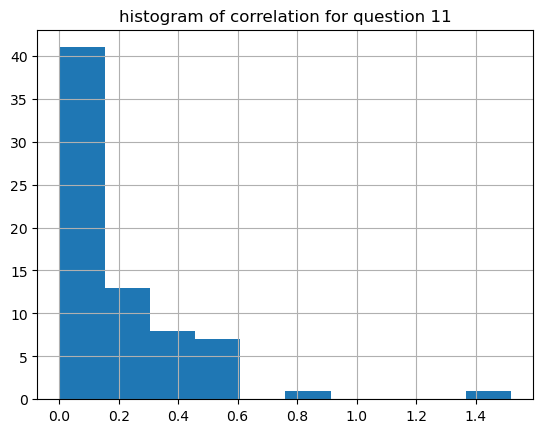

In [200]:
import matplotlib.pyplot as plt

# histogram of correlation, we pick 0.2 as the threshold to determine significance 
question11.iloc[:,5].hist()
plt.title("histogram of correlation for question 11")

In [201]:
# determine whether each row is significant 
for i in range(len(question11)):
    if question11.iloc[i,5] > 0.2:
        question11.iloc[i,6] = 1
display(question11)

,product_type,Sentiment,male_clickrate,female_clickrate,average_clickrate,correlation,significant
0,blender,negative,0.785714,0.695652,0.740683,0.121593,0
94,blender,neutral,0.291667,0.375000,0.333333,0.250000,1
190,blender,positive,0.380435,0.377358,0.378897,0.008119,0
4,car,negative,0.404762,0.375000,0.389881,0.076336,0
98,car,neutral,0.636364,0.526316,0.581340,0.189300,0
194,car,positive,0.183908,0.126582,0.155245,0.369260,1
8,coffee,negative,0.435897,0.500000,0.467949,0.136986,0
102,coffee,neutral,0.328358,0.383562,0.355960,0.155083,0
198,coffee,positive,0.217949,0.269841,0.243895,0.212766,1
12,computer,negative,0.500000,0.502618,0.501309,0.005222,0


In [202]:
# below table shows all rows that have been considered as significant 
question11.loc[question11.loc[:,"significant"] == 1]

,product_type,Sentiment,male_clickrate,female_clickrate,average_clickrate,correlation,significant
94,blender,neutral,0.291667,0.375000,0.333333,0.250000,1
194,car,positive,0.183908,0.126582,0.155245,0.369260,1
198,coffee,positive,0.217949,0.269841,0.243895,0.212766,1
206,dryer,positive,0.372093,0.236842,0.304468,0.444221,1
210,elliptical trainer,positive,0.424242,0.240000,0.332121,0.554745,1
122,furniture,neutral,0.515625,0.637681,0.576653,0.211663,1
134,makeup,neutral,0.487805,0.270270,0.379038,0.573913,1
230,makeup,positive,0.205882,0.315789,0.260836,0.421365,1
234,pants,positive,0.238095,0.416667,0.327381,0.545455,1
54,refrigerator,negative,0.026316,0.192308,0.109312,1.518519,1


# Task 12

The same question as 11 above but replace gender with age-group. (10)

# Answer 12

In order to determine if there are any significant differences in the correlation between the sentiment type of the ad context and clicking on the product type conditioned on age-group, I created a dataframe called question12, which contains columns "product_type", "Sentiment", "juvenile_clickrate", "middle-age_clickrate", "senior_clickrate", "young_clickrate", "average_clickrate", "correlation", and "significant". 

 I groupby new2 by column "clickORnot" and display columns "Sentiment", "product_type", "clickORnot",and "age_group". The formula I used to calculate "juvenile_clickrate", "middle-age_clickrate", "senior_clickrate", and "young_clickrate" is: $\frac{total \ number \ of \ an \ ad \ is\ clicked \ for \ a \ particular \ product \ and \ a \ sentiment \ (clickORnot \ = \ 0)}{total \ number\ of\ an\ ad\ is\ displayed \ for \ a \ particular \ product \ and \  a \ sentiment \ (clickORnot \ = \ 0 \ and \ 1)}$

The "average_clickrate" is calculated using formula: $\frac{juvenile\_clickrate \ + \ middle \ age\_clickrate \ + \ senior\_clickrate \ + \ young\_clickrate}{4}$

The "correlation" is calculated using a method called percentage difference and the formula is slightly different since we have more than two age groups: $\frac{abs(max(juvenile\_clickrate, \ middle-age\_clickrate, \ senior\_clickrate, \ young\_clickrate) \ - \ min(juvenile\_clickrate, \ middle-age\_clickrate, \ senior\_clickrate, \ young\_clickrate))}{average\_clickrate}$

The column "significant" is determined by comparing the "correlation" column with a threshold. The threshold is determined using a histgram based on "correlation" column and in this case, I choose 0.5. If the correlation is greater than 0.5, this row is considered significant. 

In [203]:
age_sentiment = pd.DataFrame(new2.groupby(["Sentiment", "product_type", "clickORnot", "age_group"])["clickORnot"].count())
age_sentiment = age_sentiment.rename(columns={"clickORnot": "count"})
age_sentiment = age_sentiment.reset_index()

In [204]:
# checking whether each product type has 24 records in the dataframe age_sentiment
# we have 3 different kinds of sentiments, 4 kinds of age_group, and 0 or 1 for clickORnot (3*4*2 = 24)
# product_types: face cream, pants, pressure cooker, rowing machine, and vitamin misses some rows 
for item in (age_sentiment["product_type"].unique()):
    if len(age_sentiment.loc[age_sentiment.loc[:,"product_type"] == item]) != 24:
        print(item)

face cream
pants
pressure cooker
rowing machine
vitamin


In [205]:
new_row1 = {"Sentiment":"negative", "product_type":"pressure cooker", "age_group": "juvenile", "clickORnot":1, "count":0}
new_row2 = {"Sentiment":"negative", "product_type":"pressure cooker", "age_group": "middle-age", "clickORnot":1, "count":0}
new_row3 = {"Sentiment":"negative", "product_type":"pressure cooker", "age_group": "senior", "clickORnot":1, "count":0}
new_row4 = {"Sentiment":"negative", "product_type":"pressure cooker", "age_group": "young", "clickORnot":1, "count":0}
new_row5 = {"Sentiment":"neutral", "product_type":"face cream", "age_group": "young", "clickORnot":0, "count":0}
new_row6 = {"Sentiment":"neutral", "product_type":"pants", "age_group": "middle-age", "clickORnot":0, "count":0}
new_row7 = {"Sentiment":"neutral", "product_type":"rowing machine", "age_group": "juvenile", "clickORnot":1, "count":0}
new_row8 = {"Sentiment":"positive", "product_type":"vitamin", "age_group": "juvenile", "clickORnot":1, "count":0}

In [206]:
# append missing rows in the dataframe age_sentiment
age_sentiment = age_sentiment.append(new_row1, ignore_index=True)
age_sentiment = age_sentiment.append(new_row2, ignore_index=True)
age_sentiment = age_sentiment.append(new_row3, ignore_index=True)
age_sentiment = age_sentiment.append(new_row4, ignore_index=True)
age_sentiment = age_sentiment.append(new_row5, ignore_index=True)
age_sentiment = age_sentiment.append(new_row6, ignore_index=True)
age_sentiment = age_sentiment.append(new_row7, ignore_index=True)
age_sentiment = age_sentiment.append(new_row8, ignore_index=True)
age_sentiment = age_sentiment.sort_values(["product_type", "Sentiment"])
print(age_sentiment.shape)

(576, 5)


/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/692372128.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_sentiment = age_sentiment.append(new_row1, ignore_index=True)
/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/692372128.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_sentiment = age_sentiment.append(new_row2, ignore_index=True)
/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/692372128.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_sentiment = age_sentiment.append(new_row3, ignore_index=True)
/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/692372128.py:5: FutureWarning: The frame.append method is deprecated and will be removed from

In [207]:
# check again to make sure all the product_types have 24 rows 
for item in (age_sentiment["product_type"].unique()):
    if len(age_sentiment.loc[age_sentiment.loc[:,"product_type"] == item]) != 24:
        print(item)

In [208]:
question12 = age_sentiment.iloc[:,[1,0]]
question12["juvenile_clickrate"] = 0
question12["middle-age_clickrate"] = 0
question12["senior_clickrate"] = 0
question12["young_clickrate"] = 0
question12["average_clickrate"] = 0
question12["correlation"] = 0
question12["significant"] = 0

/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/905170972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question12["juvenile_clickrate"] = 0
/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/905170972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question12["middle-age_clickrate"] = 0


In [209]:
question12 = question12.drop_duplicates()
print(question12.shape)

(72, 9)


In [210]:
# calculating juvenile, middle-age, senior, and young clickrate for each product type and sentiment 
for s in all_sentiment:
    for p in all_product_type:
            juvenile_temp = age_sentiment.loc[(age_sentiment.loc[:,"Sentiment"] == s) & (age_sentiment.loc[:,"product_type"] == p) & (age_sentiment.loc[:,"age_group"] == "juvenile")]
            middle_age_temp = age_sentiment.loc[(age_sentiment.loc[:,"Sentiment"] == s) & (age_sentiment.loc[:,"product_type"] == p) & (age_sentiment.loc[:,"age_group"] == "middle-age")]
            senior_temp = age_sentiment.loc[(age_sentiment.loc[:,"Sentiment"] == s) & (age_sentiment.loc[:,"product_type"] == p) & (age_sentiment.loc[:,"age_group"] == "senior")]
            young_temp = age_sentiment.loc[(age_sentiment.loc[:,"Sentiment"] == s) & (age_sentiment.loc[:,"product_type"] == p) & (age_sentiment.loc[:,"age_group"] == "young")]
            juvenile_avg = juvenile_temp.iloc[1,4] / (juvenile_temp.iloc[0,4] + juvenile_temp.iloc[1,4])
            middle_age_avg = middle_age_temp.iloc[1,4] / (middle_age_temp.iloc[0,4] + middle_age_temp.iloc[1,4])
            senior_avg = senior_temp.iloc[1,4] / (senior_temp.iloc[0,4] + senior_temp.iloc[1,4])
            young_avg = young_temp.iloc[1,4] / (young_temp.iloc[0,4] + young_temp.iloc[1,4])
            question12.loc[(question12.loc[:,"product_type"] == p) & (question12.loc[:,"Sentiment"] == s), "juvenile_clickrate"] = juvenile_avg
            question12.loc[(question12.loc[:,"product_type"] == p) & (question12.loc[:,"Sentiment"] == s), "middle-age_clickrate"] = middle_age_avg
            question12.loc[(question12.loc[:,"product_type"] == p) & (question12.loc[:,"Sentiment"] == s), "senior_clickrate"] = senior_avg
            question12.loc[(question12.loc[:,"product_type"] == p) & (question12.loc[:,"Sentiment"] == s), "young_clickrate"] = young_avg

In [211]:
'''
for i in range(0, len(question12) , 3):
    # average_click_rate = statistics.mean(question12.iloc[i,2:6])
    average_click_rate = product_type_sentiment_clickrate.loc[product_type_sentiment_clickrate.loc[:,"product_type"] == question12.iloc[i,0]]
    question12.iloc[i,6] = average_click_rate.iloc[0,1]
    question12.iloc[i+1,6] = average_click_rate.iloc[0,2]
    question12.iloc[i+2,6] = average_click_rate.iloc[0,3]
question12.head()
'''

'\nfor i in range(0, len(question12) , 3):\n    # average_click_rate = statistics.mean(question12.iloc[i,2:6])\n    average_click_rate = product_type_sentiment_clickrate.loc[product_type_sentiment_clickrate.loc[:,"product_type"] == question12.iloc[i,0]]\n    question12.iloc[i,6] = average_click_rate.iloc[0,1]\n    question12.iloc[i+1,6] = average_click_rate.iloc[0,2]\n    question12.iloc[i+2,6] = average_click_rate.iloc[0,3]\nquestion12.head()\n'

In [212]:
# calculating average click rate and correlation 
import statistics 
for i in range(len(question12)):
    temp_row = question12.iloc[i,2:6]
    max_row = max(temp_row)
    min_row = min(temp_row)
    top_v = abs(max_row - min_row)
    bot_v = statistics.mean(temp_row)
    corr = top_v/bot_v
    question12.iloc[i, 6] = bot_v
    question12.iloc[i, 7] = corr

/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/2340058410.py:9: RuntimeWarning: invalid value encountered in double_scalars
  corr = top_v/bot_v


In [213]:
"""
for i in range(len(question12)):
    temp = question12.iloc[i, 2:7]
    for l in range(4):
        if abs(temp[l] - temp[4]) > 0.1:
            question12.iloc[i, 7] = 1
"""

'\nfor i in range(len(question12)):\n    temp = question12.iloc[i, 2:7]\n    for l in range(4):\n        if abs(temp[l] - temp[4]) > 0.1:\n            question12.iloc[i, 7] = 1\n'

Text(0.5, 1.0, 'histogram of correlation for question 12')

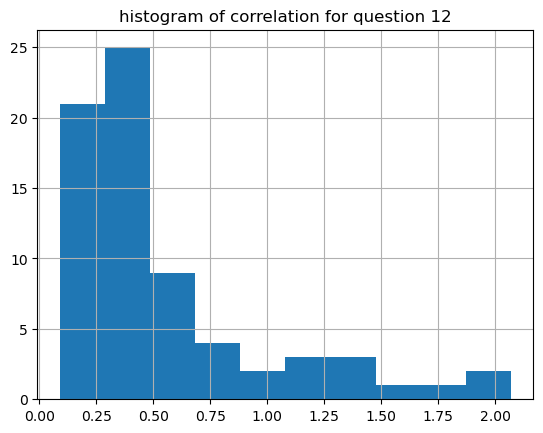

In [214]:
# histogram of correlation, we pick 0.5 as the threshold to determine significance 
question12.iloc[:,7].hist()
plt.title("histogram of correlation for question 12")

In [215]:
# determine whether each row is significant 
for i in range(len(question12)):
    if question12.iloc[i,7] > 0.5:
        question12.iloc[i,8] = 1
display(question12)

,product_type,Sentiment,juvenile_clickrate,middle-age_clickrate,senior_clickrate,young_clickrate,average_clickrate,correlation,significant
0,blender,negative,0.750000,0.738462,0.672727,0.803279,0.741117,0.176155,0
188,blender,neutral,0.313725,0.300000,0.418182,0.316667,0.337143,0.350539,0
377,blender,positive,0.320000,0.297872,0.428571,0.461538,0.376996,0.434133,0
8,car,negative,0.382353,0.404762,0.416667,0.361111,0.391223,0.142005,0
196,car,neutral,0.571429,0.484848,0.720930,0.523810,0.575254,0.410396,0
385,car,positive,0.050000,0.106383,0.322581,0.187500,0.166616,1.635982,1
16,coffee,negative,0.428571,0.580645,0.428571,0.448276,0.471516,0.322521,0
204,coffee,neutral,0.357143,0.323529,0.428571,0.333333,0.360644,0.291262,0
393,coffee,positive,0.048780,0.361111,0.303030,0.290323,0.250811,1.245282,1
24,computer,negative,0.504673,0.559524,0.476190,0.468085,0.502118,0.182106,0


In [216]:
# below table shows all rows that have been considered as significant 
question12.loc[question12.loc[:,"significant"] == 1]

,product_type,Sentiment,juvenile_clickrate,middle-age_clickrate,senior_clickrate,young_clickrate,average_clickrate,correlation,significant
385,car,positive,0.050000,0.106383,0.322581,0.187500,0.166616,1.635982,1
393,coffee,positive,0.048780,0.361111,0.303030,0.290323,0.250811,1.245282,1
32,dryer,negative,0.289474,0.266667,0.282609,0.454545,0.323324,0.581086,1
409,dryer,positive,0.350000,0.179487,0.350000,0.348837,0.307081,0.555270,1
228,elliptical trainer,neutral,0.842105,0.866667,0.466667,0.750000,0.731360,0.546927,1
236,face cream,neutral,0.941176,0.857143,0.928571,0.000000,0.681723,1.380586,1
433,furniture,positive,0.121212,0.343750,0.222222,0.405405,0.273147,1.040439,1
64,jeans,negative,0.333333,0.184615,0.285714,0.262295,0.266490,0.558063,1
80,makeup,negative,0.100000,0.200000,0.105263,0.058824,0.116022,1.216811,1
267,makeup,neutral,0.285714,0.227273,0.545455,0.450000,0.377110,0.843737,1


# Task 13

Based on your results make your recommendations. These should be in the form:
a. Based on our analysis (give details of your analysis), ads for such and such product are most likely to produce clicks in such and sentiment context (or state that we see no correlation between click rate of an ad for a product and the sentiment context of the ad)
b. Based on our analysis (with details), ads for such and such product are most likely to produce clicks in such and sentiment context by viewers of such and such gender (or state that we see no correlation between click rate of an ad for a product and the sentiment context of the ad and the gender of the viewer).
c. Based on our analysis (with details), ads for such and such product are most likely to produce clicks in such and sentiment context by viewers of such and such age-group (or state that we see no correlation between click rate of an ad for a product and the sentiment context of the ad and the age-group of the viewer). (15)

# Answer 13

In [217]:
# determining top 10 products/product_types to recommend (13a)
# .max(axis=1) to find the row-wise max
# .argsort() to return the integer indices that would sort the Series values
# .loc to arrange the rows in the desired sequence
product_type_sentiment_clickrate_max = product_type_sentiment_clickrate.iloc[product_type_sentiment_clickrate.max(axis=1).argsort()[::-1],:]
product_type_sentiment_clickrate_max.iloc[0:10]

/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_7452/943101890.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  product_type_sentiment_clickrate_max = product_type_sentiment_clickrate.iloc[product_type_sentiment_clickrate.max(axis=1).argsort()[::-1],:]


,product_type,negative_click_rate,neutral_click_rate,positive_click_rate
6,face cream,0.902778,0.930556,0.583333
13,pressure cooker,0.000000,0.864407,0.714286
11,pants,0.835821,0.818182,0.333333
21,vitamin,0.835294,0.814815,0.186667
9,lipstick,0.692308,0.511450,0.825688
7,furniture,0.825000,0.578947,0.279070
0,blender,0.742739,0.337963,0.378788
5,elliptical trainer,0.491228,0.737705,0.344828
4,dryer,0.323699,0.734568,0.308642
17,speakers,0.348837,0.705882,0.543478


In [218]:
# finding products for each product_type 
print(products.loc[products.loc[:,"product_type"] == "face cream"])
print(products.loc[products.loc[:,"product_type"] == "pressure cooker"])
print(products.loc[products.loc[:,"product_type"] == "pants"])
print(products.loc[products.loc[:,"product_type"] == "vitamin"])
print(products.loc[products.loc[:,"product_type"] == "lipstick"])
print(products.loc[products.loc[:,"product_type"] == "furniture"])
print(products.loc[products.loc[:,"product_type"] == "blender"])
print(products.loc[products.loc[:,"product_type"] == "elliptical trainer"])
print(products.loc[products.loc[:,"product_type"] == "dryer"])
print(products.loc[products.loc[:,"product_type"] == "speakers"])

                 product                        product_URL product_type
10  Clinique moisturizer  https://clinique.com/moisturizers  face cream 
                      product                     product_URL     product_type
2  InstantPot pressure cooker  https://InstantPot.com/cookers  pressure cooker
         product               product_URL product_type
17  Docker pants  https://docker.com/pants  pants      
                 product                   product_URL product_type
7  Centrum MultiVitamins  https://centrum.com/vitamins  vitamin    
                product                     product_URL product_type
20  Maybelline lipstick  http://maybelline.com/lipstick  lipstick   
37  covergirl lipstick   https://covergirl.co/lipsticks  lipstick   
              product                     product_URL product_type
23  Ikea sofa          https://Ikea.com/sofas          furniture  
24  Broyhill recliner  https://broyhill.com/recliners  furniture  
                  product               

Based on my analysis, ads for Clinique moisturizer (face cream) are most likely to produce clicks in neutral textual context in which an ad was displayed to a viewer with a click rate of 93.06%. 

Ads for InstantPot pressure cooker (pressure cooker) are most likely to produce clicks in neutral textual context in which an ad was displayed to a viewer with a click rate of 86.44%. 

Ads for Docker pants (pants) are most likely to produce clicks in negative textual context in which an ad was displayed to a viewer with a click rate of 83.58%. 

Ads for Centrum MultiVitamins (vitamins) are most likely to produce clicks in negative textual context in which an ad was displayed to a viewer with a click rate of 83.53%. 

Ads for Maybelline lipstick (lipstick) are most likely to produce clicks in positive textual context in which an ad was displayed to a viewer with a click rate of 82.57%. 

Ads for Ikea sofa (furniture) are most likely to produce clicks in negative textual context in which an ad was displayed to a viewer with a click rate of 82.5%. 

Ads for Vitamix blender (blender) are most likely to produce clicks in negative textual context in which an ad was displayed to a viewer with a click rate of 74.27%. 

Ads for NordicTrack elliptical (elliptical trainer) are most likely to produce clicks in neutral textual context in which an ad was displayed to a viewer with a click rate of 73.77%. 

Ads for Maytag dryer (dryer) are most likely to produce clicks in neutral textual context in which an ad was displayed to a viewer with a click rate of 73.46%. 

Ads for Soundwave speakers (speakers) are most likely to produce clicks in neutral textual context in which an ad was displayed to a viewer with a click rate of 70.59%. 

In [219]:
# determining top 10 products/product_types to recommend (13b)
question11_max = question11.iloc[question11.iloc[:,2:4].max(axis=1).argsort()[::-1],:]
question11_max.iloc[0:20]

,product_type,Sentiment,male_clickrate,female_clickrate,average_clickrate,correlation,significant
118,face cream,neutral,0.944444,0.916667,0.930556,0.029851,0
146,pressure cooker,neutral,0.793103,0.933333,0.863218,0.162450,0
24,face cream,negative,0.928571,0.886364,0.907468,0.046512,0
82,vitamin,negative,0.800000,0.875000,0.837500,0.089552,0
178,vitamin,neutral,0.735294,0.872340,0.803817,0.170494,0
226,lipstick,positive,0.866667,0.775510,0.821088,0.111019,0
44,pants,negative,0.810811,0.866667,0.838739,0.066595,0
28,furniture,negative,0.800000,0.846154,0.823077,0.056075,0
138,pants,neutral,0.800000,0.842105,0.821053,0.051282,0
0,blender,negative,0.785714,0.695652,0.740683,0.121593,0


In [220]:
# finding products for each product_type 
print(products.loc[products.loc[:,"product_type"] == "face cream"])
print(products.loc[products.loc[:,"product_type"] == "pressure cooker"])
print(products.loc[products.loc[:,"product_type"] == "vitamin"])
print(products.loc[products.loc[:,"product_type"] == "lipstick"])
print(products.loc[products.loc[:,"product_type"] == "pants"])
print(products.loc[products.loc[:,"product_type"] == "furniture"])
print(products.loc[products.loc[:,"product_type"] == "blender"])
print(products.loc[products.loc[:,"product_type"] == "elliptical trainer"])
print(products.loc[products.loc[:,"product_type"] == "television"])
print(products.loc[products.loc[:,"product_type"] == "women's purse"])

                 product                        product_URL product_type
10  Clinique moisturizer  https://clinique.com/moisturizers  face cream 
                      product                     product_URL     product_type
2  InstantPot pressure cooker  https://InstantPot.com/cookers  pressure cooker
                 product                   product_URL product_type
7  Centrum MultiVitamins  https://centrum.com/vitamins  vitamin    
                product                     product_URL product_type
20  Maybelline lipstick  http://maybelline.com/lipstick  lipstick   
37  covergirl lipstick   https://covergirl.co/lipsticks  lipstick   
         product               product_URL product_type
17  Docker pants  https://docker.com/pants  pants      
              product                     product_URL product_type
23  Ikea sofa          https://Ikea.com/sofas          furniture  
24  Broyhill recliner  https://broyhill.com/recliners  furniture  
                  product               

Based on my analysis, ads for Clinique moisturizer (face cream) are most likely to produce clicks in neutral textual context by male with a click rate of 94.44%. 

Ads for InstantPot pressure cooker (pressure cooker) are most likely to produce clicks in neutral textual context by female with a click rate of 93.33%.  

Ads for Centrum MultiVitamins (vitamin) are most likely to produce clicks in negative textual context by female with a click rate of 87.5%.  

Ads for Maybelline lipstick (lipstick) are most likely to produce clicks in positive textual context by male with a click rate of 86.67%.   

Ads for Docker pants (pants) are most likely to produce clicks in negative textual context by female with a click rate of 84.62%.  

Ads for Ikea sofa (furniture) are most likely to produce clicks in negative textual context by female with a click rate of 86.67%.  

Ads for Vitamix blender (blender) are most likely to produce clicks in negative textual context by male with a click rate of 78.57%.  

Ads for NordicTrack elliptical (elliptical trainer) are most likely to produce clicks in neutral textual context by male with a click rate of 75.86%.  

Ads for LG TV (television) are most likely to produce clicks in neutral textual context by female with a click rate of 75.00%.  

Ads for Coach purse (women's purse) are most likely to produce clicks in neutral textual context by male with a click rate of 74.07%.  

In [221]:
# determining top 10 products/product_types to recommend (13c)
question12_max = question12.iloc[question12.iloc[:,2:6].max(axis=1).argsort()[::-1],:]
question12_max.iloc[0:20]

,product_type,Sentiment,juvenile_clickrate,middle-age_clickrate,senior_clickrate,young_clickrate,average_clickrate,correlation,significant
48,face cream,negative,0.947368,0.937500,0.823529,0.900000,0.902099,0.137279,0
236,face cream,neutral,0.941176,0.857143,0.928571,0.000000,0.681723,1.380586,1
449,lipstick,positive,0.692308,0.807692,0.923077,0.870968,0.823511,0.280226,0
290,pressure cooker,neutral,0.900000,0.909091,0.833333,0.812500,0.863731,0.111830,0
481,pressure cooker,positive,0.750000,0.565217,0.764706,0.909091,0.747254,0.460183,0
88,pants,negative,0.692308,0.904762,0.812500,0.882353,0.822981,0.258152,0
164,vitamin,negative,0.900000,0.750000,0.833333,0.857143,0.835119,0.179615,0
56,furniture,negative,0.809524,0.870968,0.820513,0.793103,0.823527,0.094550,0
228,elliptical trainer,neutral,0.842105,0.866667,0.466667,0.750000,0.731360,0.546927,1
353,vitamin,neutral,0.857143,0.777778,0.789474,0.826087,0.812620,0.097666,0


In [222]:
# finding products for each product_type 
print(products.loc[products.loc[:,"product_type"] == "face cream"])
print(products.loc[products.loc[:,"product_type"] == "lipstick"])
print(products.loc[products.loc[:,"product_type"] == "pressure cooker"])
print(products.loc[products.loc[:,"product_type"] == "pants"])
print(products.loc[products.loc[:,"product_type"] == "vitamin"])
print(products.loc[products.loc[:,"product_type"] == "furniture"])
print(products.loc[products.loc[:,"product_type"] == "elliptical trainer"])
print(products.loc[products.loc[:,"product_type"] == "washer"])
print(products.loc[products.loc[:,"product_type"] == "blender"])
print(products.loc[products.loc[:,"product_type"] == "women's purse"])

                 product                        product_URL product_type
10  Clinique moisturizer  https://clinique.com/moisturizers  face cream 
                product                     product_URL product_type
20  Maybelline lipstick  http://maybelline.com/lipstick  lipstick   
37  covergirl lipstick   https://covergirl.co/lipsticks  lipstick   
                      product                     product_URL     product_type
2  InstantPot pressure cooker  https://InstantPot.com/cookers  pressure cooker
         product               product_URL product_type
17  Docker pants  https://docker.com/pants  pants      
                 product                   product_URL product_type
7  Centrum MultiVitamins  https://centrum.com/vitamins  vitamin    
              product                     product_URL product_type
23  Ikea sofa          https://Ikea.com/sofas          furniture  
24  Broyhill recliner  https://broyhill.com/recliners  furniture  
                   product              

Based on my analysis, ads for Clinique moisturizer (face cream) are most likely to produce clicks in negative textual context by juvenile with a click rate of 94.74%. 

Ads for Maybelline lipstick (lipstick) are most likely to produce clicks in positive textual context by senior with a click rate of 92.31%.  

Ads for InstantPot pressure cooker (pressure cooker) are most likely to produce clicks in neutral textual context by  middle-age persons with a click rate of 90.91%.  

Ads for Docker pants (pants) are most likely to produce clicks in negative textual context by middle-age persons with a click rate of 90.48%.   

Ads for Centrum MultiVitamins (vitamin) are most likely to produce clicks in negative textual context by juvenile with a click rate of 90.00%.  

Ads for Ikea sofa (furniture) are most likely to produce clicks in negative textual context by middle-age persons with a click rate of 87.10%.  

Ads for NordicTrack elliptical (elliptical trainer) are most likely to produce clicks in neutral textual context by middle-age persons with a click rate of 86.67%.  

Ads for Maytag washer (washer) are most likely to produce clicks in positive textual context by young people with a click rate of 81.25%.  

Ads for Vitamix blender (blender) are most likely to produce clicks in negative textual context by young people with a click rate of 80.33%.  

Ads for Coach purse (women's purse) are most likely to produce clicks in neutral textual context by senior with a click rate of 78.26%.  

# Conclusion

When making recommendations regarding ads for such and such product are most likely to produce clicks in such and sentiment context, ads for such and such product are most likely to produce clicks in such and sentiment context by viewers of such and such gender, and ads for such and such product are most likely to produce clicks in such and sentiment context by viewers of such and such age-group, we assume that the analysis of click rate regarding product type can be direcyly apply to individual product. Moreover, if there are multiple products in that product type, we randomly choose one from them. In order to make my methodology scalable, I use python script instead of SQL query to calculate different kinds of click rates. Then, I create tables in the database, making sure all primary keys and foreign key constraints are correct. One main limitation I have within the study is that when choosing the threshold to determine whether each row (in task 11 and 12) is significant, I don't perform any statistical testing. I choose the threshold based on histogram of the correlation column. If one wants to be rigorous, they need to perform statistical testings to determine if the record is significant. Moreover, in the log file, I only have 10000 rows of data for 50 products, can potentially gather more information to conduct a more rigorous analysis. Lastly, the whole study doesn’t consider interaction effects when making recommendations, in the future, one should measure how gender and age group together affect the click rate for different products based on different sentiments. 
